# Refactor the IR clip pipeline so things are a bit faster
- For each batch of depth data also load IR, clip the frames a put through model

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import deeplabcut as dlc

Loading DLC 3.0.0rc6...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


In [15]:
import cv2

def read_video_to_array(video_path):
    """
    Read an AVI file into a numpy array using OpenCV
    
    Args:
        video_path: path to video file
    
    Returns:
        frames: numpy array of shape (time, height, width, channels)
        metadata: dict containing video metadata
    """
    cap = cv2.VideoCapture(video_path)
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Initialize array to store frames
    frames = np.empty((n_frames, height, width, 3), dtype=np.uint8)
    
    # Read all frames
    for i in range(100):
        ret, frame = cap.read()
        if ret:
            # Convert BGR to RGB
            frames[i] = frame#cv2.cvtColor(frame, COLOR_BGR2RGB)
    
    cap.release()
    
    metadata = {
        'fps': fps,
        'height': height,
        'width': width,
        'num_frames': n_frames
    }
    
    return frames, metadata

In [9]:
ir = '/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/14weeks/arid1b/cohort15/session_20240801100434/ir_clipped.avi'

In [59]:
cfg = '/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/keypoint_model/config-v2.yaml'

In [16]:
frames, _ = read_video_to_array(ir)

In [17]:
frames.shape

(14393, 576, 640, 3)

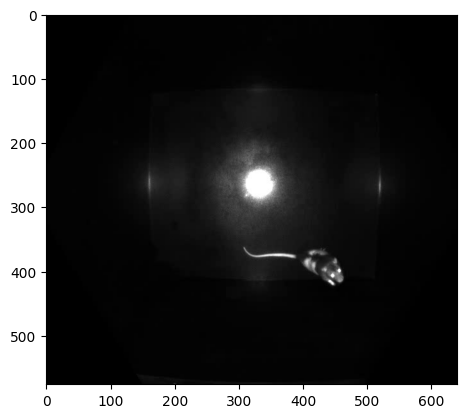

In [19]:
plt.imshow(frames[0])

In [29]:
pred = dlc.analyze_videos(
    cfg,
    [frames],
    gpus=0,
    videotype=None,
    batch_size=100,
    display_progress=True,
)


Using snapshot-50000 for model /n/groups/datta/jlove/data/rat_seq/rat_seq_paper/keypoint_model/dlc-models/iteration-0/KeypointMoSeqDLCOct18-trainset95shuffle1


/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


No video(s) were found. Please check your paths and/or 'video_type'.


In [32]:
from deeplabcut.pose_estimation_tensorflow.core import predict

In [48]:
jdir(predict)

['OpenVINOSession',
 'PoseNetFactory',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'argmax_pose_predict',
 'extract_GPUprediction',
 'extract_cnn_output',
 'extract_cnn_outputmulti',
 'get_top_values',
 'getpose',
 'getposeNP',
 'multi_pose_predict',
 'np',
 'setup_GPUpose_prediction',
 'setup_openvino_pose_prediction',
 'setup_pose_prediction',
 'tf']

In [60]:
from deeplabcut.utils.auxiliaryfunctions import read_config
yaml_cfg = read_config(cfg)

In [66]:
cfg = '/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/keypoint_model/dlc-models/iteration-0/KeypointMoSeqDLCOct18-trainset95shuffle1/test/pose_cfg.yaml'

In [67]:
from deeplabcut.pose_estimation_tensorflow.config import load_config
cfg = load_config(cfg)

In [74]:
cfg['init_weights'] = '/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/keypoint_model/dlc-models/iteration-0/KeypointMoSeqDLCOct18-trainset95shuffle1/train/snapshot-50000.index'

In [75]:
sess, inputs, outputs = predict.setup_pose_prediction(cfg)

NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Graph execution error:

Detected at node 'save/RestoreV2' defined at (most recent call last):
    File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/jal5475/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "/home/jal5475/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "/home/jal5475/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
      coro.send(None)
    File "/home/jal5475/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/jal5475/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/jal5475/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_111575/3022637081.py", line 1, in <module>
      sess, inputs, outputs = predict.setup_pose_prediction(cfg)
    File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/deeplabcut/pose_estimation_tensorflow/core/predict.py", line 41, in setup_pose_prediction
      restorer = tf.compat.v1.train.Saver()
Node: 'save/RestoreV2'
Tensor name "pose/locref_pred/block4/biases" not found in checkpoint files /n/groups/datta/jlove/data/rat_seq/rat_seq_paper/keypoint_model/dlc-models/iteration-0/KeypointMoSeqDLCOct18-trainset95shuffle1/train/snapshot-50000.index
	 [[{{node save/RestoreV2}}]]

Original stack trace for 'save/RestoreV2':
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    self._run_once()
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
    handle._run()
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
    await self.process_one()
  File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one
    await dispatch(*args)
  File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
    await result
  File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
    await super().execute_request(stream, ident, parent)
  File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
    reply_content = await reply_content
  File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
    res = shell.run_cell(
  File "/home/jal5475/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
    return super().run_cell(*args, **kwargs)
  File "/home/jal5475/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
    result = self._run_cell(
  File "/home/jal5475/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
    result = runner(coro)
  File "/home/jal5475/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
    coro.send(None)
  File "/home/jal5475/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/jal5475/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "/home/jal5475/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_111575/3022637081.py", line 1, in <module>
    sess, inputs, outputs = predict.setup_pose_prediction(cfg)
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/deeplabcut/pose_estimation_tensorflow/core/predict.py", line 41, in setup_pose_prediction
    restorer = tf.compat.v1.train.Saver()
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/tensorflow/python/training/saver.py", line 931, in __init__
    self.build()
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/tensorflow/python/training/saver.py", line 943, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/tensorflow/python/training/saver.py", line 971, in _build
    self.saver_def = self._builder._build_internal(  # pylint: disable=protected-access
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/tensorflow/python/training/saver.py", line 540, in _build_internal
    restore_op = self._AddRestoreOps(filename_tensor, saveables,
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/tensorflow/python/training/saver.py", line 360, in _AddRestoreOps
    all_tensors = self.bulk_restore(filename_tensor, saveables, preferred_shard,
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/tensorflow/python/training/saver.py", line 608, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1517, in restore_v2
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/tensorflow/python/framework/op_def_library.py", line 797, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "/home/jal5475/.miniconda/envs/DEEPLABCUT/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 3800, in _create_op_internal
    ret = Operation(


In [52]:
predict.setup_pose_prediction??

Signature: predict.setup_pose_prediction(cfg, allow_growth=False, collect_extra=False)
Docstring: <no docstring>
Source:   
def setup_pose_prediction(cfg, allow_growth=False, collect_extra=False):
    tf.compat.v1.reset_default_graph()
    inputs = tf.compat.v1.placeholder(
        tf.float32, shape=[cfg["batch_size"], None, None, 3]
    )
    net_heads = PoseNetFactory.create(cfg).test(inputs)
    extra_dict = {}
    outputs = [net_heads["part_prob"]]
    if cfg["location_refinement"]:
        outputs.append(net_heads["locref"])

    if ("multi-animal" in cfg["dataset_type"]) and cfg["partaffinityfield_predict"]:
        print("Activating extracting of PAFs")
        outputs.append(net_heads["pairwise_pred"])

    outputs.append(net_heads["peak_inds"])

    if collect_extra:
        extra_dict["features"] = net_heads["features"]

    restorer = tf.compat.v1.train.Saver()

    if allow_growth:
        config = tf.compat.v1.ConfigProto()
        config.gpu_options.allow_growth = True
  